# __Ensemble Models for Tree-based Methods__
### Assessing the Impact of __Socioeconomic Factors__ and __Healthcare Accessibility__ on __Postnatal Care__ Uptake Across Indian Districts Using NFHS Data

### Rationale for choosing the features to predict Postnatal Care

1. **Antenatal check-up in the first trimester (%):** Early antenatal care indicates a proactive approach to maternal health. Women who seek early care are likely to have better access to health services and be more aware of the importance of postnatal care, creating a continuum of care.
2. **Institutional births (%):** Deliveries in health facilities are strongly linked to access to trained medical professionals and structured healthcare systems. These facilities often promote and provide postnatal care as part of comprehensive maternal services.
3. **At least 4 antenatal care visits (%):** Multiple antenatal visits show consistent engagement with the healthcare system, reflecting awareness and adherence to medical advice. Such engagement increases the likelihood of postnatal care.
4. **Births attended by skilled health personnel (%):** The presence of skilled personnel ensures better management of childbirth and immediate postnatal care recommendations, leading to increased uptake of postnatal services.
5. **Iron folic acid for 100+ days (%):** Consuming iron folic acid supplements reflects a mother’s adherence to health recommendations during pregnancy. This adherence may carry forward into seeking postnatal care.
6. **Iron folic acid for 180+ days (%):** Longer supplementation duration highlights higher maternal compliance and health awareness, which are predictors of further healthcare utilization like postnatal care.
7. **Neonatal tetanus protection (%):** Protection against neonatal tetanus indicates healthcare system engagement during pregnancy, which often extends to postnatal care practices.
8. **Registered pregnancies with MCP card (%):** Registration ensures women are part of a healthcare program (Mother and Child Protection), receiving reminders and services related to maternal and child health, including postnatal care.
9. **Households using clean fuel for cooking (%):** Clean fuel use is a proxy for socioeconomic status and awareness of health risks. Women from such households are more likely to seek postnatal care as part of overall health-conscious behavior.



Flowchart for Ensemble Methods Demo


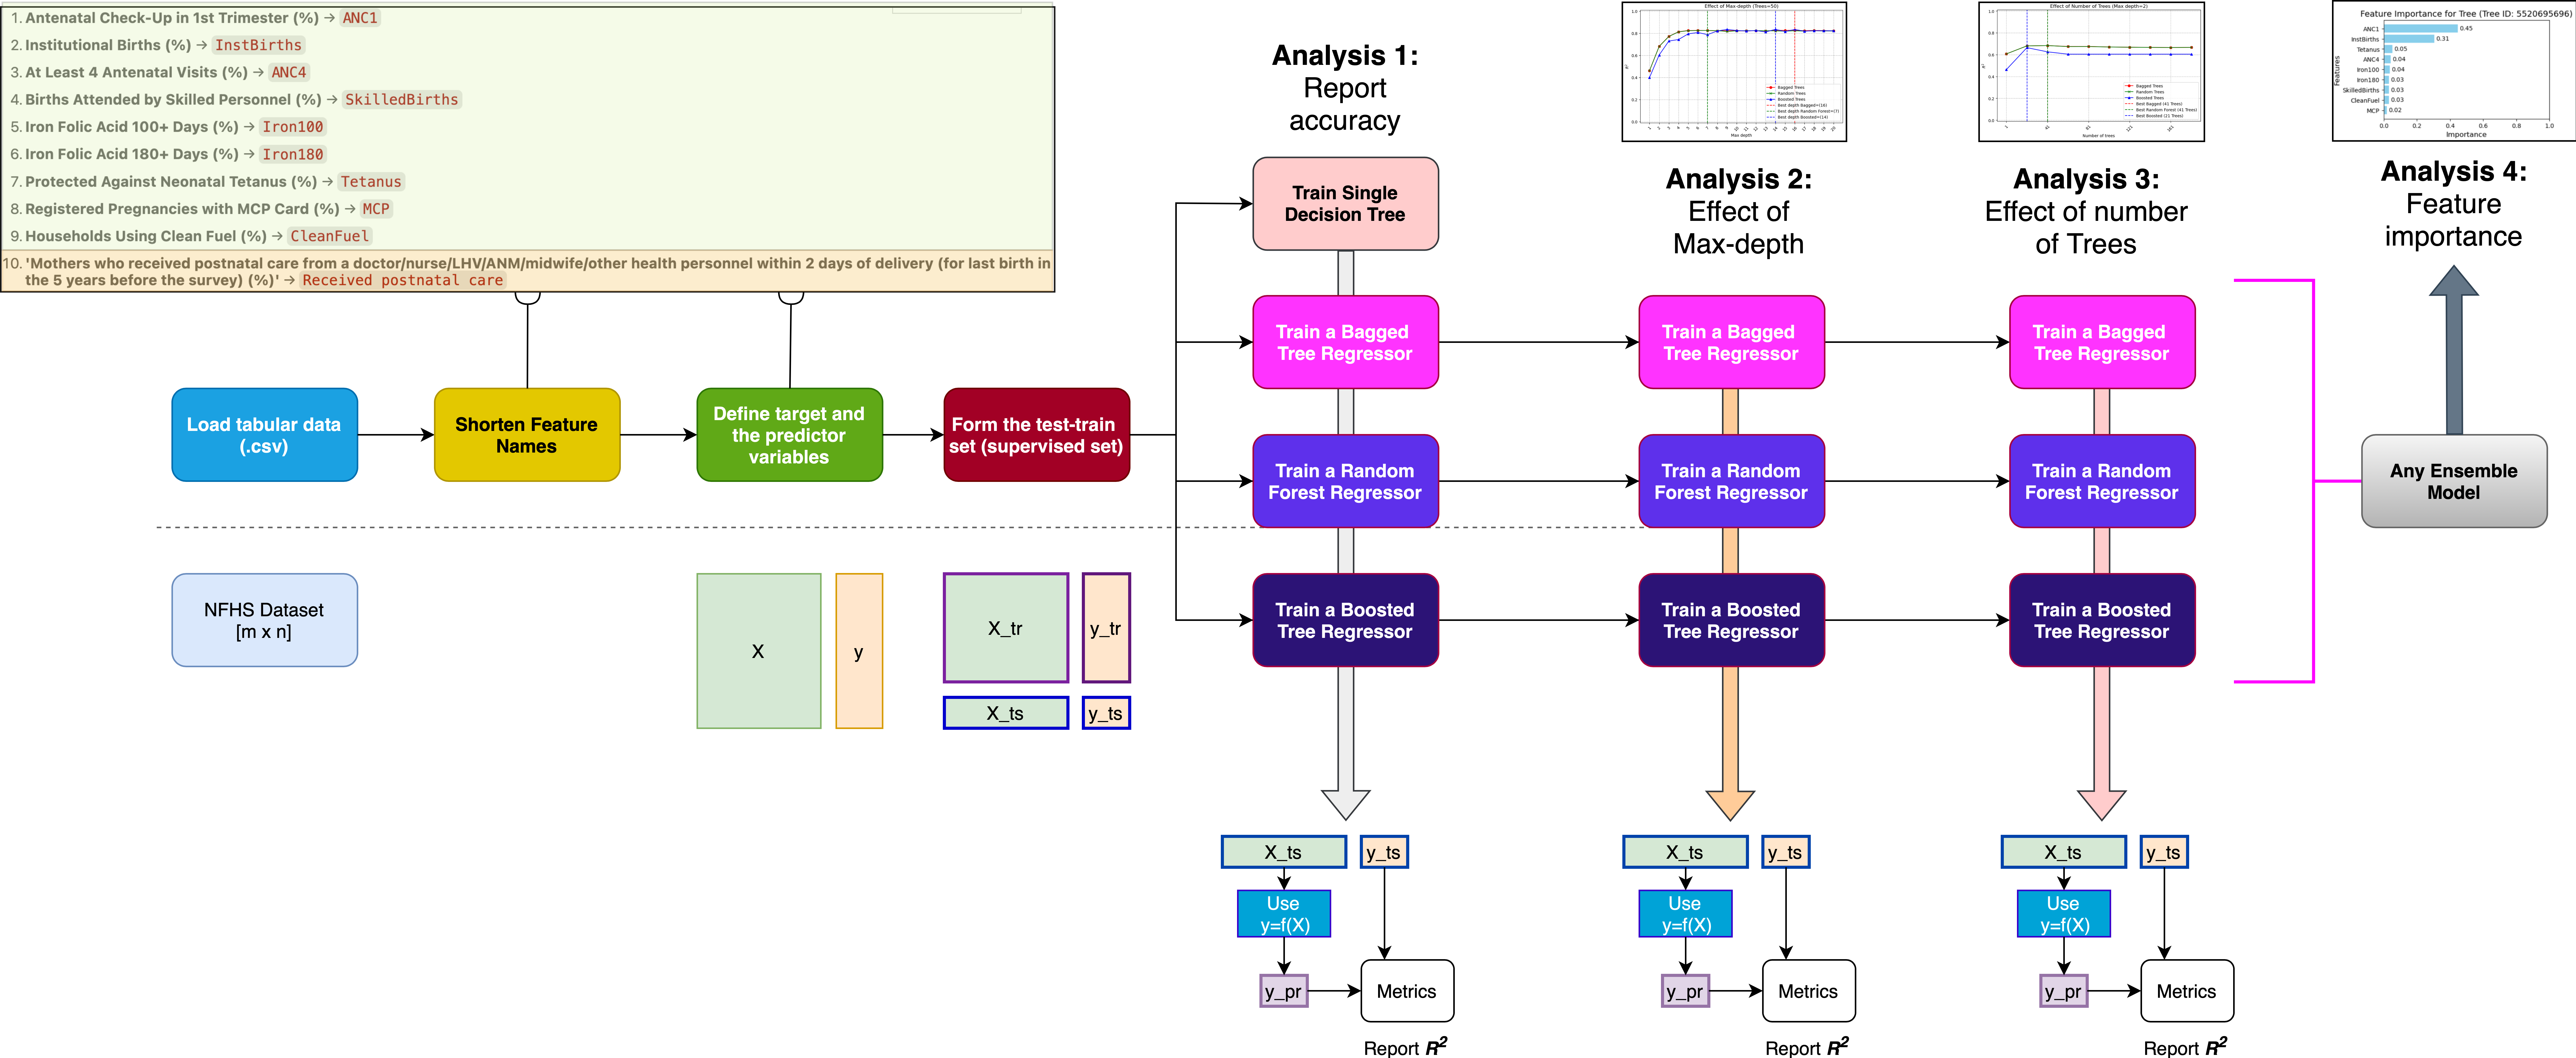

In [390]:
from IPython.display import Image
print("Flowchart for Ensemble Methods Demo")
Image(filename='img/flowchart ensemble.drawio-3.png')  # reading local images

## Import relevant libraries

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree

## Load NFHS Data

In [2]:
# Load the data
nfhs_data = pd.read_csv('../data/NFHS_5_India_Districts_Level.csv')

# Define target and predictors
target = 'Mothers who received postnatal care from a doctor/nurse/LHV/ANM/midwife/other health personnel within 2 days of delivery (for last birth in the 5 years before the survey) (%)'
predictors = [
    'Mothers who had an antenatal check-up in the first trimester  (for last birth in the 5 years before the survey) (%)',
    'Institutional births (in the 5 years before the survey) (%)',
    'Mothers who had at least 4 antenatal care visits  (for last birth in the 5 years before the survey) (%)',
    'Births attended by skilled health personnel (in the 5 years before the survey)10 (%)',
    'Mothers who consumed iron folic acid for 100 days or more when they were pregnant (for last birth in the 5 years before the survey) (%)',
    'Mothers who consumed iron folic acid for 180 days or more when they were pregnant (for last birth in the 5 years before the survey} (%)',
    'Mothers whose last birth was protected against neonatal tetanus (for last birth in the 5 years before the survey)9 (%)',
    'Registered pregnancies for which the mother received a Mother and Child Protection (MCP) card (for last birth in the 5 years before the survey) (%)',
    'Households using clean fuel for cooking3 (%)'
    ]

### Short Names for Selected Features

1. **Antenatal Check-Up in 1st Trimester (%)** → `ANC1`
2. **Institutional Births (%)** → `InstBirths`
3. **At Least 4 Antenatal Visits (%)** → `ANC4`
4. **Births Attended by Skilled Personnel (%)** → `SkilledBirths`
5. **Iron Folic Acid 100+ Days (%)** → `Iron100`
6. **Iron Folic Acid 180+ Days (%)** → `Iron180`
7. **Protected Against Neonatal Tetanus (%)** → `Tetanus`
8. **Registered Pregnancies with MCP Card (%)** → `MCP`
9. **Households Using Clean Fuel (%)** → `CleanFuel`

10. **'Mothers who received postnatal care from a doctor/nurse/LHV/ANM/midwife/other health personnel within 2 days of delivery (for last birth in the 5 years before the survey) (%)'** → `Received postnatal care`

In [7]:
# Renaming the columns into short names
predictors_new = ['ANC1',
                  'InstBirths',
                  'ANC4',
                  'SkilledBirths',
                  'Iron100',
                  'Iron180',
                  'Tetanus',
                  'MCP',
                  'CleanFuel'
                  ]

# Create a dictionary for renaming
rename_dict = {old: new for old, new in zip(predictors, predictors_new)}

# Create the new DataFrame with selected columns and new names
data_colnew = nfhs_data[predictors].rename(columns=rename_dict)
data_colnew['Received postnatal care'] = nfhs_data[target]
# data_colnew

## Form the train and test sets

In [8]:
# Preprocess the data and form train test pairs
model_data = data_colnew.dropna() ## 
X = model_data[predictors_new]
y = model_data['Received postnatal care']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

print(f"Predictor shape: {X.shape[0]} x {X.shape[1]}")
print(f"Target shape: {y.shape[0]} x {1}")
# X_train
# y_train

Predictor shape: 707 x 9
Target shape: 707 x 1


### $R^2$: One of the metrics to measure accuracy in regression models


\begin{equation}
R^2 = 1 - \frac{\text{SS}_{\text{res}}}{\text{SS}_{\text{tot}}}
\end{equation}

Where:
- $( \text{SS}_{\text{res}} )$ (Residual Sum of Squares): $( \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 )$
- $( \text{SS}_{\text{tot}} )$ (Total Sum of Squares): $( \sum_{i=1}^{n} (y_i - \bar{y})^2 )$
- $( y_i )$: Observed values
- $( \hat{y}_i )$: Predicted values
- $( \bar{y} )$: Mean of the observed values
- $( n )$: Number of data points

### Explanation
- $( R^2 )$ measures how well the regression model explains the variability in the data.
- $( R^2 )$ ranges from 0 to 1:
  - $( R^2 = 1 )$: Perfect prediction.
  - $( R^2 = 0 )$: No predictive power.
- Negative $( R^2 )$ occurs if the model performs worse than predicting the mean $( \bar{y} )$.

## A Single Decision Tree Regression Model

In [9]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

# Initialize and train model
decision_trees = DecisionTreeRegressor(max_depth=4, random_state=42)
decision_trees.fit(X_train, y_train)

# Predict and evaluate
y_pred = decision_trees.predict(X_test)
print("R_squared of Decision Trees:", r2_score(y_test, y_pred))

R_squared of Decision Trees: 0.6834471517435436


## Setting the Hyper-parameters

In [12]:
number_of_trees = 10  # also, known as number of weak learners in your ensembele model
depth = 2  # Controls the depth of the tree durring splitting

### Model 1: Bagged Trees Regressor

In [13]:
from sklearn.ensemble import BaggingRegressor

# Initialize and train model
bagged_trees = BaggingRegressor(
    DecisionTreeRegressor(max_depth=depth),
    n_estimators=number_of_trees,
    random_state=42
)
bagged_trees.fit(X_train, y_train)

# Predict and evaluate
y_pred = bagged_trees.predict(X_test)
print("R_squared of Bagged Trees:", r2_score(y_test, y_pred))

R_squared of Bagged Trees: 0.6830874375925537


### Model 2: Random Forest Regressor

In [15]:
from sklearn.ensemble import RandomForestRegressor

# Initialize and train model
random_forest = RandomForestRegressor(
    n_estimators=number_of_trees, 
    max_depth=depth,
    max_features=2,
    random_state=42)
random_forest.fit(X_train, y_train)

# Predict and evaluate
y_pred = random_forest.predict(X_test)
print("R_squared of Random Forest Regressor:", r2_score(y_test, y_pred))

R_squared of Random Forest Regressor: 0.5656347978008842


### Model 3: Boosted Trees (AdaBoost)

In [16]:
from sklearn.ensemble import AdaBoostRegressor

# Initialize and train model
boosted_trees = AdaBoostRegressor(
    DecisionTreeRegressor(max_depth=depth),
    n_estimators=number_of_trees,
    random_state=42
)
boosted_trees.fit(X_train, y_train)

# Predict and evaluate
y_pred = boosted_trees.predict(X_test)
print("R_squared of Boosted Trees:", r2_score(y_test, y_pred))

R_squared of Boosted Trees: 0.6822978843532912


## Effect of Max-depth

In [17]:
Number_of_Trees = 50  # this is held constant
depth_range = np.arange(1, 21, 1)  # this is varied in a range

rsq_bagged_d = []
rsq_rforest_d = []
rsq_boost_d = []
for md in depth_range:
    # Bagged Trees
    bagged_trees_depth = BaggingRegressor(
        DecisionTreeRegressor(max_depth=md),
        n_estimators=Number_of_Trees,
        random_state=42
    )
    bagged_trees_depth.fit(X_train, y_train)
    y_pred = bagged_trees_depth.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    rsq_bagged_d.append(r2)
    
    # Random Forest
    random_forest_depth = RandomForestRegressor(
        n_estimators=Number_of_Trees, 
        max_depth=md,
        random_state=42)
    random_forest_depth.fit(X_train, y_train)
    y_pred = random_forest_depth.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    rsq_rforest_d.append(r2)
    
    # Boosted Trees
    boosted_trees_depth = AdaBoostRegressor(
        DecisionTreeRegressor(max_depth=md),
        n_estimators=Number_of_Trees,
        random_state=42
        )
    boosted_trees_depth.fit(X_train, y_train)
    y_pred = boosted_trees_depth.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    rsq_boost_d.append(r2)

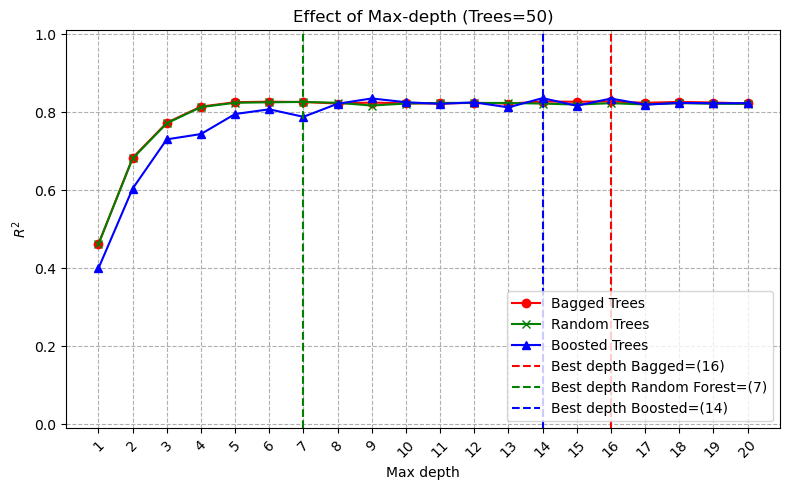

In [18]:
plt.figure(figsize=(8, 5))
plt.plot(depth_range, rsq_bagged_d, "-o", color="r", label="Bagged Trees")
plt.plot(depth_range, rsq_rforest_d, "-x", color="g", label="Random Trees")
plt.plot(depth_range, rsq_boost_d, "-^", color="b", label="Boosted Trees")

best_depth_bagged = depth_range[np.argmax(rsq_bagged_d)]  # Best depth for Bagged Trees
best_depth_rforest = depth_range[np.argmax(rsq_rforest_d)]  # Best depth for Random Forest
best_depth_boost = depth_range[np.argmax(rsq_boost_d)]  # Best depth for Boosted Trees
plt.axvline(best_depth_bagged, color="r", linestyle="--", label=f"Best depth Bagged=({best_depth_bagged})")
plt.axvline(best_depth_rforest, color="g", linestyle="--", label=f"Best depth Random Forest=({best_depth_rforest})")
plt.axvline(best_depth_boost, color="b", linestyle="--", label=f"Best depth Boosted=({best_depth_boost})")

plt.ylim([-0.01, 1.01])
plt.xticks(ticks=depth_range, 
           labels=[str(x) for x in depth_range],
           rotation=45)
plt.ylabel("$R^2$")
plt.xlabel("Max depth")
plt.grid(ls="--")
plt.legend(loc=4)
plt.title(f"Effect of Max-depth (Trees={Number_of_Trees})")
plt.tight_layout()
plt.show()

## Effect of Number of Estimators

In [19]:
Max_depth = 7  # this is held constant
Total_estimators = np.arange(1, 201, 20)  # this is varied in a range

rsq_bagged_s = []
rsq_rforest_s = []
rsq_boost_s = []

for nt in Total_estimators:
    # Bagged Trees
    bagged_trees_est = BaggingRegressor(
        DecisionTreeRegressor(max_depth=Max_depth),
        n_estimators=nt,
        random_state=42
    )
    bagged_trees_est.fit(X_train, y_train)
    y_pred = bagged_trees_est.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    rsq_bagged_s.append(r2)
    
    # Random Forest
    random_forest_est = RandomForestRegressor(
        n_estimators=nt, 
        max_depth=Max_depth,
        random_state=42)
    random_forest_est.fit(X_train, y_train)
    y_pred = random_forest_est.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    rsq_rforest_s.append(r2)
    
    # Boosted Trees
    boosted_trees_est = AdaBoostRegressor(
        DecisionTreeRegressor(max_depth=Max_depth),
        n_estimators=nt,
        random_state=42
        )
    boosted_trees_est.fit(X_train, y_train)
    y_pred = boosted_trees_est.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    rsq_boost_s.append(r2)

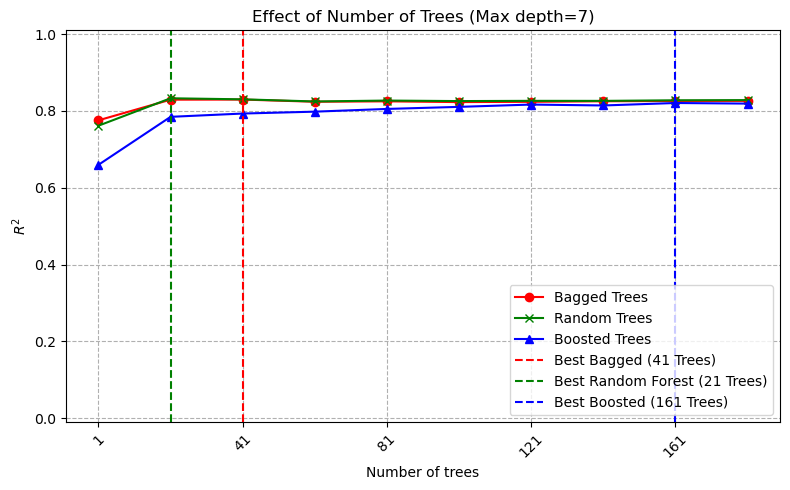

In [20]:
plt.figure(figsize=(8, 5))
plt.plot(Total_estimators, rsq_bagged_s, "-o", color="r", label="Bagged Trees")
plt.plot(Total_estimators, rsq_rforest_s, "-x", color="g", label="Random Trees")
plt.plot(Total_estimators, rsq_boost_s, "-^", color="b", label="Boosted Trees")

best_trees_bagged = Total_estimators[np.argmax(rsq_bagged_s)]  # Best number of trees for Bagged Trees
best_trees_rforest = Total_estimators[np.argmax(rsq_rforest_s)]  # Best number of trees for Random Forest
best_trees_boost = Total_estimators[np.argmax(rsq_boost_s)]  # Best number of trees for Boosted Trees

plt.axvline(best_trees_bagged, color="r", linestyle="--", label=f"Best Bagged ({best_trees_bagged} Trees)")
plt.axvline(best_trees_rforest, color="g", linestyle="--", label=f"Best Random Forest ({best_trees_rforest} Trees)")
plt.axvline(best_trees_boost, color="b", linestyle="--", label=f"Best Boosted ({best_trees_boost} Trees)")

plt.ylim([-0.01, 1.01])
plt.xticks(ticks=Total_estimators[::2], 
           labels=[str(x) for x in Total_estimators[::2]],
           rotation=45)
plt.ylabel("$R^2$")
plt.xlabel("Number of trees")
plt.grid(ls="--")
plt.legend(loc=4)
plt.title(f"Effect of Number of Trees (Max depth={Max_depth})")
plt.tight_layout()
plt.show()

## Plotting sample trees from the trained ensemble model

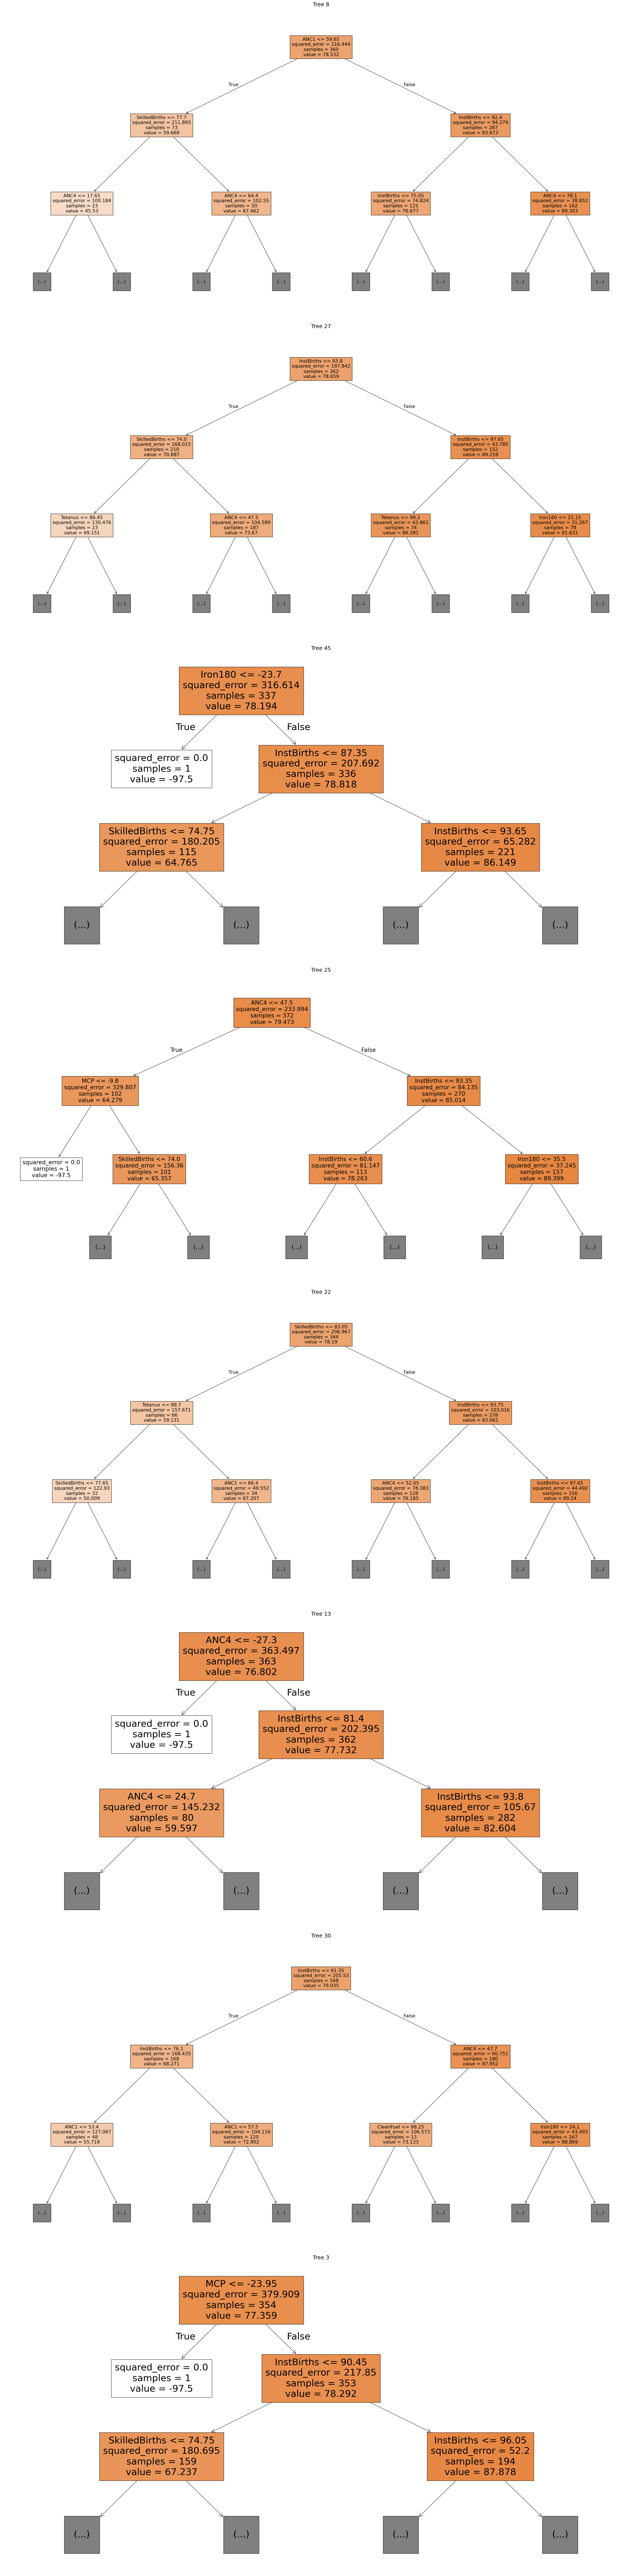

In [21]:
from sklearn.tree import plot_tree

ens_model = random_forest_depth

num_trees = len(ens_model.estimators_)  # Total number of trees in the forest
random_trees = np.random.choice(num_trees, 8, replace=False)  # Randomly select 8 trees

fig, axes = plt.subplots(8, 1, figsize=(30, 120))  # Create a 8x1 grid for visibility
axes = axes.flatten()  # Flatten the axes for easier iteration

# Plot the 8 randomly chosen trees with limited depth
for i, tree_index in enumerate(random_trees):
    tree = ens_model.estimators_[tree_index]  # Access the tree by index
    plot_tree(tree, ax=axes[i], 
              filled=True, 
              feature_names=X_train.columns, 
              max_depth=2)
    axes[i].set_title(f"Tree {tree_index + 1}", fontsize=18)

plt.tight_layout()
plt.show()

### Feature Importance

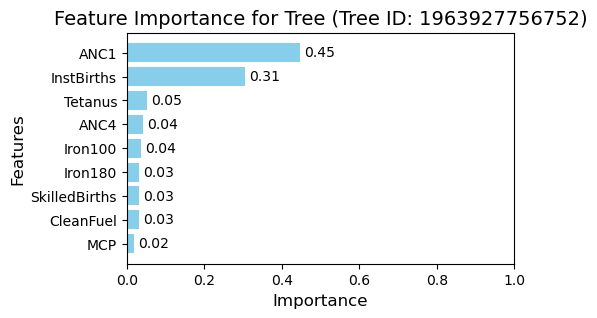

In [22]:
def plot_tree_feature_importance(tree, feature_names=None):
    # Extract feature importances
    importances = tree.feature_importances_
    n_features = len(importances)

    # Ensure feature names are aligned
    if feature_names is None:
        feature_names = [f"Feature {i}" for i in range(n_features)]
    elif len(feature_names) != n_features:
        raise ValueError("The length of feature_names must match the number of features in the tree.")

    # Combine feature names and importance values
    feature_importance = [(name, imp) for name, imp in zip(feature_names, importances) if imp > 0]
    if not feature_importance:
        print("No feature importances available (all zero).")
        return

    # Sort features by importance (descending for reversed order)
    feature_importance = sorted(feature_importance, key=lambda x: x[1], reverse=False)
    feature_names, importances = zip(*feature_importance)

    # Create a horizontal bar plot
    plt.figure(figsize=(5, 3))
    bars = plt.barh(feature_names, importances, color="skyblue")
    plt.title("Feature Importance for Tree (Tree ID: {})".format(id(tree)), fontsize=14)
    plt.xlabel("Importance", fontsize=12)
    plt.ylabel("Features", fontsize=12)
    plt.xlim(0, 1)

    # Annotate bars with importance values
    for bar in bars:
        width = bar.get_width()
        plt.text(width + 0.01, bar.get_y() + bar.get_height() / 2, f"{width:.2f}", va='center', fontsize=10)

    plt.show()

# Plot feature importance for the first tree in ensemble
plot_tree_feature_importance(
    ens_model.estimators_[0], 
    feature_names=predictors_new
)
